In [40]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime #for handling dates
import matplotlib.pyplot as plt
import random

In [2]:
MergedDF=pd.read_csv('MergedDF.csv')
MergedDF

,Unnamed: 0,RegionID_zhviAll,RegionName,City_zhviAll,State_zhviAll,Metro_zhviAll,CountyName_zhviAll,SizeRank_zhviAll,1996-04_zhviAll,1996-05_zhviAll,...,2018-09_Mediansqftrent,2018-10_Mediansqftrent,2018-11_Mediansqftrent,2018-12_Mediansqftrent,2019-01_Mediansqftrent,2019-02_Mediansqftrent,2019-03_Mediansqftrent,2019-04_Mediansqftrent,2019-05_Mediansqftrent,2019-06_Mediansqftrent
0,0,69816.0,28269,Charlotte,NC,Charlotte-Concord-Gastonia,Mecklenburg County,32.0,130694.0,131261.0,...,0.758,0.758,0.764,0.770,0.776,0.780,0.782,0.782,0.786,0.792
1,1,69823.0,28277,Charlotte,NC,Charlotte-Concord-Gastonia,Mecklenburg County,55.0,192153.0,192630.0,...,0.826,0.828,0.828,0.830,0.830,0.830,0.832,0.836,0.842,0.852
2,2,69672.0,28027,Concord,NC,Charlotte-Concord-Gastonia,Cabarrus County,85.0,140395.0,141002.0,...,0.766,0.768,0.776,0.786,0.796,0.800,0.802,0.806,0.812,0.822
3,3,69431.0,27587,Wake Forest,NC,Raleigh,Wake County,138.0,206263.0,206913.0,...,0.768,0.770,0.770,0.770,0.768,0.770,0.770,0.772,0.772,0.776
4,4,69699.0,28078,Huntersville,NC,Charlotte-Concord-Gastonia,Mecklenburg County,183.0,176002.0,176147.0,...,0.758,0.758,0.762,0.768,0.770,0.772,0.772,0.774,0.778,0.782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,790,69643.0,27972,Salvo,NC,Kill Devil Hills,Dare County,30205.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,791,69651.0,27982,Rodanthe,NC,Kill Devil Hills,Dare County,30316.0,218257.0,212818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,792,69492.0,27708,Durham,NC,Durham-Chapel Hill,Durham County,30392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,793,NaN,27960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
BreweryDF=pd.read_csv('Brewery_DistilleryData.csv')
BreweryDF

,#,File Number,Trade Name,Corp Name,Business Status,Address,City,State,Zip,Mail Address,Mail City,Mail State,Mail Zip,County,Permit Number,Issue Date,Permit Status
0,1.0,-,Ivory Tower Brewery,Appalachian State University,Withdrawn,775 Bodenheimer Drive,Boone,NaN,28608,PO Box 32066,Boone,NC,28608,Watauga,NaN,NaN,NaN
1,2.0,-,Trophy Brewing,Grain Raleigh LLC,Withdrawn,827 West Morgan Street,Raleigh,NaN,27603,NaN,NaN,NaN,NaN,Wake,NaN,NaN,NaN
2,3.0,-,Hosanna Brewing Company,Hosanna Brewing Company,Withdrawn,2912 North Main Street Unit 100,Fuquay Varina,NaN,27526,NaN,NaN,NaN,NaN,Wake,NaN,NaN,NaN
3,4.0,-,Tryon Back Door Distillery,Tryon Back Door Distillery LLC,Withdrawn,77 Maple Street,Tryon,NaN,28782,318 Springbrook Drive,Columbus,NC,28722,Polk,NaN,NaN,NaN
4,5.0,-,Blackjack Brewing Company,Blackjack Brewing Company LLC,Withdrawn,1053 East Whitaker Mill Suite 101,Raleigh,NaN,27604,NaN,NaN,NaN,NaN,Wake,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,608.0,0554CM-999,Hops Restaurant Bar and Brewery,Hops of Matthews Limited,Cancelled,9950 East Independence Blvd,Matthews,NaN,28105,150 Hancock Street,Madison,GA,30650,Mecklenburg,0554BM,5/16/1997,Cancelled
1634,609.0,0556CM-999,Laughing Seed Cafe,Laughing Seed Inc,Cancelled,40 Wall Street,Asheville,NaN,28801,NaN,NaN,NaN,NaN,Buncombe,0556BM,7/28/1997,Cancelled
1635,NaN,0556CM-999,Laughing Seed Cafe,Laughing Seed Inc,Cancelled,40 Wall Street,Asheville,NaN,28801,NaN,NaN,NaN,NaN,Buncombe,0556BW,12/8/1997,Cancelled
1636,610.0,0557CM-998,Main Street Beer Company,Williamsville Brewery Limited,Cancelled,804 West Pine Street,Farmville,NaN,27828,1911 West Main Street,Richmond,VA,23220,Pitt,00102626BW,3/7/2001,Cancelled


In [4]:
#Create a DF for breweries that have correct permit and issue dates
BrewDF_inputs=BreweryDF.loc[:,['Trade Name','Issue Date','Zip']] #pair down to only these columns
BrewDF_inputs.dropna(subset=['Issue Date','Zip'],inplace=True) #Drop rows with 'NaN' value for 'Issue Date' or 'Zip'
BrewDF_inputs.drop_duplicates(subset='Trade Name',keep='first',inplace=True) #keep only earliest instance of each Brewery
BrewDF_inputs.rename(columns={'Trade Name':'Brewery', 'Issue Date':'Open Date'},inplace=True)
BrewDF_inputs.reset_index(drop=True,inplace=True) #reset the index to use for looping later
BrewDF_inputs


,Brewery,Open Date,Zip
0,Two Moons Brew N View,1/26/1998,28804
1,Catawba Valley Brewing Company,7/17/1998,28628
2,Hops Restaurant Bar and Brewery,8/20/1998,28078
3,Rock Bottom Restaurant and Brewery,3/23/1998,28202
4,Olde Hickory Brewery,4/15/1998,28602
...,...,...,...
470,Highland Brewing Company,9/28/1994,28801
471,Carolina Brewing Company,6/2/1995,27540
472,Top of the Hill Restaurant and Brewery,9/18/1996,27514
473,Laughing Seed Cafe,7/28/1997,28801


In [5]:

zhviAll1=[]
zhviAll3=[]
zhviAll5=[]
zhviNC1=[]
zhviNC3=[]
zhviNC5=[]


listnames=['zhviAll1',
           'zhviAll3',
           'zhviAll5',    
           'zhviNC1',
           'zhviNC3',
           'zhviNC5']

lists=[zhviAll1,
       zhviAll3,
       zhviAll5,
       zhviNC1,
       zhviNC3,
       zhviNC5]

#the print commands are inserted to show where the loop has an error by seeing the last line printed before giving the error print
#these will be removed when finalized
print('start')
for l in range(len(lists)):
    for i in range(len(BrewDF_inputs)):
        try:    
            print('date') #these are for debugging to see where the loop went wrong
            dt=datetime.strptime(BrewDF_inputs.loc[i,'Open Date'],'%m/%d/%Y')
            print(f'dt successful l{l},i{i}') #these are for debugging to see where the loop went wrong
            year=dt.year
            print(f'year successful l{l},i{i}') #these are for debugging to see where the loop went wrong
            year1=year+1
            print(f'year+1 successful l{l},i{i}') #these are for debugging to see where the loop went wrong
            year3=year+3
            year5=year+5
            if dt.month<10: #need to add a leading zero to match the formatting of the DF column
                print(f'month<10 l{l},i{i}') #these are for debugging to see where the loop went wrong
                month='0'+str(dt.month)
            else:
                print(f'month>=10 l{l},i{i}') #these are for debugging to see where the loop went wrong
                month=dt.month
            print(l,i,year, year1,year3,year5, month) #these are for debugging to see where the loop went wrong
            
            if l<=2:
                y=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year}-{month}_zhviAll'])
                print(l,i,y) #these are for debugging to see where the loop went wrong
            if l>=3:
                y=float(MergedDF[f'{year}-{month}_zhviAll'].mean())
            if l==0: #use one year in the future for the first 4 loops (0,1,2,3)
                y1=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year1}-{month}_zhviAll'])
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==1: #second 'l' loop needs to use year3
                y1=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year3}-{month}_zhviAll'])
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong     
            if l==2: #need to change from using one year out to five years out for loop 'l' 2
                y1=float(MergedDF.loc[MergedDF['RegionName']==BrewDF_inputs.loc[i,'Zip'],f'{year5}-{month}_zhviAll'])
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==3: 
                y1=float(MergedDF[f'{year1}-{month}_zhviAll'].mean())
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==4: 
                y1=float(MergedDF[f'{year3}-{month}_zhviAll'].mean())
                print(l,i,y,y1,listnames[l]) #these are for debugging to see where the loop went wrong
            if l==5: 
                y1=float(MergedDF[f'{year5}-{month}_zhviAll'].mean())
            D1=(y1/y)-1
            print(f'---{D1}---l{l},i{i}') #these are for debugging to see where the loop went wrong
            lists[l].append(D1) #append to list
        except:
            print(f'Error loop l{l}, i{i}') #these are for debugging to see where the loop went wrong
            lists[l].append(np.nan) #Error Message entered into DF when data is not available
    
    BrewDF_inputs[listnames[l]]=lists[l]

start
date
dt successful l0,i0
year successful l0,i0
year+1 successful l0,i0
month<10 l0,i0
0 0 1998 1999 2001 2003 01
0 0 152925.0
0 0 152925.0 160242.0 zhviAll1
---0.047846983815595934---l0,i0
date
dt successful l0,i1
year successful l0,i1
year+1 successful l0,i1
month<10 l0,i1
0 1 1998 1999 2001 2003 07
Error loop l0, i1
date
dt successful l0,i2
year successful l0,i2
year+1 successful l0,i2
month<10 l0,i2
0 2 1998 1999 2001 2003 08
0 2 192016.0
0 2 192016.0 197231.0 zhviAll1
---0.027159195067077757---l0,i2
date
dt successful l0,i3
year successful l0,i3
year+1 successful l0,i3
month<10 l0,i3
0 3 1998 1999 2001 2003 03
0 3 144531.0
0 3 144531.0 158152.0 zhviAll1
---0.09424275760909429---l0,i3
date
dt successful l0,i4
year successful l0,i4
year+1 successful l0,i4
month<10 l0,i4
0 4 1998 1999 2001 2003 04
0 4 93410.0
0 4 93410.0 98745.0 zhviAll1
---0.057113799379081565---l0,i4
date
dt successful l0,i5
year successful l0,i5
year+1 successful l0,i5
month<10 l0,i5
0 5 1999 2000 2002 2004 0

0 74 226044.0 241869.0 zhviAll1
---0.0700084939215373---l0,i74
date
dt successful l0,i75
year successful l0,i75
year+1 successful l0,i75
month<10 l0,i75
0 75 2010 2011 2013 2015 09
0 75 238155.0
0 75 238155.0 228921.0 zhviAll1
----0.038773067959942065---l0,i75
date
dt successful l0,i76
year successful l0,i76
year+1 successful l0,i76
month>=10 l0,i76
0 76 2010 2011 2013 2015 11
0 76 120294.0
0 76 120294.0 115909.0 zhviAll1
----0.0364523583886146---l0,i76
date
dt successful l0,i77
year successful l0,i77
year+1 successful l0,i77
month<10 l0,i77
0 77 2010 2011 2013 2015 09
0 77 138641.0
0 77 138641.0 125723.0 zhviAll1
----0.09317590034693923---l0,i77
date
dt successful l0,i78
year successful l0,i78
year+1 successful l0,i78
month>=10 l0,i78
0 78 2010 2011 2013 2015 11
0 78 82626.0
0 78 82626.0 71405.0 zhviAll1
----0.13580471038172004---l0,i78
date
dt successful l0,i79
year successful l0,i79
year+1 successful l0,i79
month>=10 l0,i79
0 79 2010 2011 2013 2015 12
0 79 147644.0
0 79 147644.0 143

0 157 246395.0 255865.0 zhviAll1
---0.03843422147364994---l0,i157
date
Error loop l0, i158
date
dt successful l0,i159
year successful l0,i159
year+1 successful l0,i159
month>=10 l0,i159
0 159 2014 2015 2017 2019 10
0 159 343292.0
0 159 343292.0 362937.0 zhviAll1
---0.05722533586567713---l0,i159
date
dt successful l0,i160
year successful l0,i160
year+1 successful l0,i160
month<10 l0,i160
0 160 2014 2015 2017 2019 02
0 160 259088.0
0 160 259088.0 269640.0 zhviAll1
---0.04072747483480521---l0,i160
date
dt successful l0,i161
year successful l0,i161
year+1 successful l0,i161
month<10 l0,i161
0 161 2014 2015 2017 2019 02
0 161 96811.0
0 161 96811.0 100222.0 zhviAll1
---0.03523359948766158---l0,i161
date
dt successful l0,i162
year successful l0,i162
year+1 successful l0,i162
month<10 l0,i162
0 162 2014 2015 2017 2019 08
0 162 167135.0
0 162 167135.0 175053.0 zhviAll1
---0.047374876596763205---l0,i162
date
dt successful l0,i163
year successful l0,i163
year+1 successful l0,i163
month<10 l0,i163

date
Error loop l0, i265
date
Error loop l0, i266
date
Error loop l0, i267
date
Error loop l0, i268
date
Error loop l0, i269
date
Error loop l0, i270
date
Error loop l0, i271
date
Error loop l0, i272
date
Error loop l0, i273
date
Error loop l0, i274
date
Error loop l0, i275
date
Error loop l0, i276
date
Error loop l0, i277
date
Error loop l0, i278
date
Error loop l0, i279
date
Error loop l0, i280
date
Error loop l0, i281
date
Error loop l0, i282
date
Error loop l0, i283
date
Error loop l0, i284
date
Error loop l0, i285
date
Error loop l0, i286
date
Error loop l0, i287
date
Error loop l0, i288
date
Error loop l0, i289
date
Error loop l0, i290
date
Error loop l0, i291
date
Error loop l0, i292
date
Error loop l0, i293
date
Error loop l0, i294
date
Error loop l0, i295
date
Error loop l0, i296
date
Error loop l0, i297
date
Error loop l0, i298
date
Error loop l0, i299
date
Error loop l0, i300
date
Error loop l0, i301
date
Error loop l0, i302
date
Error loop l0, i303
date
Error loop l0, i304


year successful l1,i13
year+1 successful l1,i13
month>=10 l1,i13
1 13 1999 2000 2002 2004 11
1 13 82797.0
1 13 82797.0 94228.0 zhviAll3
---0.13806055774967696---l1,i13
date
dt successful l1,i14
year successful l1,i14
year+1 successful l1,i14
month<10 l1,i14
1 14 2002 2003 2005 2007 06
1 14 105634.0
1 14 105634.0 109861.0 zhviAll3
---0.04001552530435282---l1,i14
date
dt successful l1,i15
year successful l1,i15
year+1 successful l1,i15
month<10 l1,i15
1 15 2010 2011 2013 2015 06
1 15 224037.0
1 15 224037.0 209663.0 zhviAll3
----0.06415904515771953---l1,i15
date
dt successful l1,i16
year successful l1,i16
year+1 successful l1,i16
month<10 l1,i16
1 16 2000 2001 2003 2005 07
1 16 62778.0
1 16 62778.0 60502.0 zhviAll3
----0.03625473892127817---l1,i16
date
dt successful l1,i17
year successful l1,i17
year+1 successful l1,i17
month<10 l1,i17
1 17 2011 2012 2014 2016 08
1 17 214346.0
1 17 214346.0 227193.0 zhviAll3
---0.059935804726936714---l1,i17
date
dt successful l1,i18
year successful l1,i18

1 93 122123.0
1 93 122123.0 129266.0 zhviAll3
---0.05849021068922311---l1,i93
date
dt successful l1,i94
year successful l1,i94
year+1 successful l1,i94
month<10 l1,i94
1 94 2012 2013 2015 2017 05
1 94 152468.0
1 94 152468.0 186095.0 zhviAll3
---0.22055119762835473---l1,i94
date
Error loop l1, i95
date
Error loop l1, i96
date
dt successful l1,i97
year successful l1,i97
year+1 successful l1,i97
month<10 l1,i97
1 97 2012 2013 2015 2017 05
1 97 210026.0
1 97 210026.0 224471.0 zhviAll3
---0.06877719901345558---l1,i97
date
Error loop l1, i98
date
dt successful l1,i99
year successful l1,i99
year+1 successful l1,i99
month<10 l1,i99
1 99 2018 2019 2021 2023 06
1 99 218336.0
Error loop l1, i99
date
dt successful l1,i100
year successful l1,i100
year+1 successful l1,i100
month>=10 l1,i100
1 100 2012 2013 2015 2017 11
1 100 445150.0
1 100 445150.0 526986.0 zhviAll3
---0.18383915534089623---l1,i100
date
Error loop l1, i101
date
dt successful l1,i102
year successful l1,i102
year+1 successful l1,i102


1 162 167135.0
1 162 167135.0 195909.0 zhviAll3
---0.17216022975439027---l1,i162
date
dt successful l1,i163
year successful l1,i163
year+1 successful l1,i163
month<10 l1,i163
1 163 2014 2015 2017 2019 08
1 163 203809.0
1 163 203809.0 212858.0 zhviAll3
---0.044399413176061886---l1,i163
date
Error loop l1, i164
date
dt successful l1,i165
year successful l1,i165
year+1 successful l1,i165
month<10 l1,i165
1 165 2015 2016 2018 2020 01
1 165 295977.0
1 165 295977.0 312860.0 zhviAll3
---0.057041594448217214---l1,i165
date
dt successful l1,i166
year successful l1,i166
year+1 successful l1,i166
month<10 l1,i166
1 166 2014 2015 2017 2019 04
1 166 122077.0
1 166 122077.0 132810.0 zhviAll3
---0.08791991939513588---l1,i166
date
dt successful l1,i167
year successful l1,i167
year+1 successful l1,i167
month>=10 l1,i167
1 167 2014 2015 2017 2019 10
1 167 269204.0
1 167 269204.0 341966.0 zhviAll3
---0.2702857312669946---l1,i167
date
dt successful l1,i168
year successful l1,i168
year+1 successful l1,i168

2 12 221214.0 236358.0 zhviAll5
---0.06845859665301468---l2,i12
date
dt successful l2,i13
year successful l2,i13
year+1 successful l2,i13
month>=10 l2,i13
2 13 1999 2000 2002 2004 11
2 13 82797.0
2 13 82797.0 100684.0 zhviAll5
---0.21603439738154773---l2,i13
date
dt successful l2,i14
year successful l2,i14
year+1 successful l2,i14
month<10 l2,i14
2 14 2002 2003 2005 2007 06
2 14 105634.0
2 14 105634.0 117937.0 zhviAll5
---0.11646818259272584---l2,i14
date
dt successful l2,i15
year successful l2,i15
year+1 successful l2,i15
month<10 l2,i15
2 15 2010 2011 2013 2015 06
2 15 224037.0
2 15 224037.0 238849.0 zhviAll5
---0.06611407937081815---l2,i15
date
dt successful l2,i16
year successful l2,i16
year+1 successful l2,i16
month<10 l2,i16
2 16 2000 2001 2003 2005 07
2 16 62778.0
2 16 62778.0 64534.0 zhviAll5
---0.027971582401478123---l2,i16
date
dt successful l2,i17
year successful l2,i17
year+1 successful l2,i17
month<10 l2,i17
2 17 2011 2012 2014 2016 08
2 17 214346.0
2 17 214346.0 254010.0 

2 60 2012 2013 2015 2017 04
2 60 81350.0
2 60 81350.0 116922.0 zhviAll5
---0.43727105101413644---l2,i60
date
dt successful l2,i61
year successful l2,i61
year+1 successful l2,i61
month<10 l2,i61
2 61 2011 2012 2014 2016 02
2 61 127556.0
2 61 127556.0 138905.0 zhviAll5
---0.08897268650631873---l2,i61
date
dt successful l2,i62
year successful l2,i62
year+1 successful l2,i62
month<10 l2,i62
2 62 2011 2012 2014 2016 05
2 62 179608.0
2 62 179608.0 206466.0 zhviAll5
---0.14953676896352053---l2,i62
date
dt successful l2,i63
year successful l2,i63
year+1 successful l2,i63
month<10 l2,i63
2 63 2009 2010 2012 2014 05
2 63 174180.0
2 63 174180.0 157685.0 zhviAll5
----0.09470088414284072---l2,i63
date
dt successful l2,i64
year successful l2,i64
year+1 successful l2,i64
month<10 l2,i64
2 64 2013 2014 2016 2018 01
2 64 177594.0
2 64 177594.0 216852.0 zhviAll5
---0.22105476536369473---l2,i64
date
dt successful l2,i65
year successful l2,i65
year+1 successful l2,i65
month<10 l2,i65
2 65 2010 2011 2013 2

2 143 172257.0 218422.0 zhviAll5
---0.2680007198546359---l2,i143
date
dt successful l2,i144
year successful l2,i144
year+1 successful l2,i144
month>=10 l2,i144
2 144 2014 2015 2017 2019 11
2 144 138137.0
2 144 138137.0 149184.0 zhviAll5
---0.07997133280728552---l2,i144
date
Error loop l2, i145
date
dt successful l2,i146
year successful l2,i146
year+1 successful l2,i146
month>=10 l2,i146
2 146 2013 2014 2016 2018 10
2 146 199687.0
2 146 199687.0 213235.0 zhviAll5
---0.06784617927055847---l2,i146
date
dt successful l2,i147
year successful l2,i147
year+1 successful l2,i147
month<10 l2,i147
2 147 2014 2015 2017 2019 02
2 147 333731.0
2 147 333731.0 451975.0 zhviAll5
---0.35430930899436963---l2,i147
date
Error loop l2, i148
date
dt successful l2,i149
year successful l2,i149
year+1 successful l2,i149
month<10 l2,i149
2 149 2014 2015 2017 2019 02
2 149 92406.0
2 149 92406.0 114499.0 zhviAll5
---0.23908620652338586---l2,i149
date
dt successful l2,i150
year successful l2,i150
year+1 successful 

3 18 147513.87022900765 152046.08998732571 zhviNC1
---0.030724024468221423---l3,i18
date
dt successful l3,i19
year successful l3,i19
year+1 successful l3,i19
month>=10 l3,i19
3 19 2001 2002 2004 2006 12
3 19 130463.05194805194 133471.8128440367 zhviNC1
---0.02306216856848331---l3,i19
date
dt successful l3,i20
year successful l3,i20
year+1 successful l3,i20
month>=10 l3,i20
3 20 2002 2003 2005 2007 11
3 20 133139.40550458716 139044.628113879 zhviNC1
---0.04435368016637553---l3,i20
date
dt successful l3,i21
year successful l3,i21
year+1 successful l3,i21
month<10 l3,i21
3 21 2003 2004 2006 2008 07
3 21 136779.075 142963.3966101695 zhviNC1
---0.045213945262968736---l3,i21
date
dt successful l3,i22
year successful l3,i22
year+1 successful l3,i22
month>=10 l3,i22
3 22 2003 2004 2006 2008 10
3 22 138358.31729055257 144909.53637901862 zhviNC1
---0.04734965860208096---l3,i22
date
dt successful l3,i23
year successful l3,i23
year+1 successful l3,i23
month<10 l3,i23
3 23 2004 2005 2007 2009 03
3 

3 66 155519.8144611187 149195.00677506774 zhviNC1
----0.040668822220285006---l3,i66
date
dt successful l3,i67
year successful l3,i67
year+1 successful l3,i67
month<10 l3,i67
3 67 2011 2012 2014 2016 09
3 67 142825.210106383 139921.22853368561 zhviNC1
----0.0203324158986663---l3,i67
date
Error loop l3, i68
date
dt successful l3,i69
year successful l3,i69
year+1 successful l3,i69
month<10 l3,i69
3 69 2010 2011 2013 2015 01
3 69 154014.93215739485 147269.7463284379 zhviNC1
----0.043795661462641466---l3,i69
date
dt successful l3,i70
year successful l3,i70
year+1 successful l3,i70
month<10 l3,i70
3 70 2010 2011 2013 2015 01
3 70 154014.93215739485 147269.7463284379 zhviNC1
----0.043795661462641466---l3,i70
date
dt successful l3,i71
year successful l3,i71
year+1 successful l3,i71
month<10 l3,i71
3 71 2010 2011 2013 2015 03
3 71 153134.20217096337 146047.96795727636 zhviNC1
----0.04627466701250538---l3,i71
date
dt successful l3,i72
year successful l3,i72
year+1 successful l3,i72
month<10 l3,i

---0.02533149480595709---l3,i112
date
dt successful l3,i113
year successful l3,i113
year+1 successful l3,i113
month<10 l3,i113
3 113 2013 2014 2016 2018 01
3 113 139973.78656126483 142841.00260416666 zhviNC1
---0.020483949983355565---l3,i113
date
dt successful l3,i114
year successful l3,i114
year+1 successful l3,i114
month>=10 l3,i114
3 114 2012 2013 2015 2017 10
3 114 139955.85751978893 141944.73759791124 zhviNC1
---0.014210766975873756---l3,i114
date
dt successful l3,i115
year successful l3,i115
year+1 successful l3,i115
month<10 l3,i115
3 115 2013 2014 2016 2018 01
3 115 139973.78656126483 142841.00260416666 zhviNC1
---0.020483949983355565---l3,i115
date
Error loop l3, i116
date
dt successful l3,i117
year successful l3,i117
year+1 successful l3,i117
month<10 l3,i117
3 117 2013 2014 2016 2018 01
3 117 139973.78656126483 142841.00260416666 zhviNC1
---0.020483949983355565---l3,i117
date
dt successful l3,i118
year successful l3,i118
year+1 successful l3,i118
month<10 l3,i118
3 118 2013 

dt successful l3,i176
year successful l3,i176
year+1 successful l3,i176
month>=10 l3,i176
3 176 2014 2015 2017 2019 10
3 176 145220.3038961039 149219.96188055907 zhviNC1
---0.027542002579175717---l3,i176
date
Error loop l3, i177
date
dt successful l3,i178
year successful l3,i178
year+1 successful l3,i178
month>=10 l3,i178
3 178 2014 2015 2017 2019 10
3 178 145220.3038961039 149219.96188055907 zhviNC1
---0.027542002579175717---l3,i178
date
dt successful l3,i179
year successful l3,i179
year+1 successful l3,i179
month>=10 l3,i179
3 179 2014 2015 2017 2019 10
3 179 145220.3038961039 149219.96188055907 zhviNC1
---0.027542002579175717---l3,i179
date
dt successful l3,i180
year successful l3,i180
year+1 successful l3,i180
month>=10 l3,i180
3 180 2014 2015 2017 2019 10
3 180 145220.3038961039 149219.96188055907 zhviNC1
---0.027542002579175717---l3,i180
date
dt successful l3,i181
year successful l3,i181
year+1 successful l3,i181
month>=10 l3,i181
3 181 2014 2015 2017 2019 11
3 181 145539.1714285

4 10 118900.12719298246 131137.38148148148 zhviNC3
---0.10292044741581474---l4,i10
date
dt successful l4,i11
year successful l4,i11
year+1 successful l4,i11
month<10 l4,i11
4 11 2000 2001 2003 2005 01
4 11 123963.39516129032 133828.63853211008 zhviNC3
---0.07958190688456024---l4,i11
date
dt successful l4,i12
year successful l4,i12
year+1 successful l4,i12
month<10 l4,i12
4 12 2006 2007 2009 2011 06
4 12 160366.7373737374 159670.93296853625 zhviNC3
----0.004338832457378983---l4,i12
date
dt successful l4,i13
year successful l4,i13
year+1 successful l4,i13
month>=10 l4,i13
4 13 1999 2000 2002 2004 11
4 13 122993.45362903226 133139.40550458716 zhviNC3
---0.0824918040447642---l4,i13
date
dt successful l4,i14
year successful l4,i14
year+1 successful l4,i14
month<10 l4,i14
4 14 2002 2003 2005 2007 06
4 14 131935.93148148147 148474.35882352942 zhviNC3
---0.1253519580022011---l4,i14
date
dt successful l4,i15
year successful l4,i15
year+1 successful l4,i15
month<10 l4,i15
4 15 2010 2011 2013 201

4 71 153134.20217096337 140408.09881422925 zhviNC3
----0.0831042521939438---l4,i71
date
dt successful l4,i72
year successful l4,i72
year+1 successful l4,i72
month<10 l4,i72
4 72 2010 2011 2013 2015 06
4 72 152517.14654002714 140843.11488250652 zhviNC3
----0.0765424211136605---l4,i72
date
dt successful l4,i73
year successful l4,i73
year+1 successful l4,i73
month<10 l4,i73
4 73 2010 2011 2013 2015 07
4 73 152023.53188602443 141117.5548302872 zhviNC3
----0.07173874281459058---l4,i73
date
dt successful l4,i74
year successful l4,i74
year+1 successful l4,i74
month<10 l4,i74
4 74 2012 2013 2015 2017 08
4 74 139951.35317460317 148608.21982210927 zhviNC3
---0.061856255414020955---l4,i74
date
dt successful l4,i75
year successful l4,i75
year+1 successful l4,i75
month<10 l4,i75
4 75 2010 2011 2013 2015 09
4 75 150670.0013568521 141649.19582245432 zhviNC3
----0.05987127797943392---l4,i75
date
dt successful l4,i76
year successful l4,i76
year+1 successful l4,i76
month>=10 l4,i76
4 76 2010 2011 2013 2

4 196 146572.9020356234 166713.0756620429 zhviNC3
---0.1374072106556543---l4,i196
date
Error loop l4, i197
date
dt successful l4,i198
year successful l4,i198
year+1 successful l4,i198
month<10 l4,i198
4 198 2015 2016 2018 2020 06
4 198 147890.7048346056 169196.10340479194 zhviNC3
---0.14406178261178315---l4,i198
date
Error loop l4, i199
date
Error loop l4, i200
date
Error loop l4, i201
date
Error loop l4, i202
date
Error loop l4, i203
date
Error loop l4, i204
date
dt successful l4,i205
year successful l4,i205
year+1 successful l4,i205
month<10 l4,i205
4 205 2015 2016 2018 2020 05
4 205 147513.87022900765 168433.43127364438 zhviNC3
---0.14181419694405828---l4,i205
date
Error loop l4, i206
date
Error loop l4, i207
date
Error loop l4, i208
date
Error loop l4, i209
date
Error loop l4, i210
date
Error loop l4, i211
date
Error loop l4, i212
date
Error loop l4, i213
date
Error loop l4, i214
date
Error loop l4, i215
date
Error loop l4, i216
date
Error loop l4, i217
date
Error loop l4, i218
dat

---0.18094705305243286---l5,i10
date
dt successful l5,i11
year successful l5,i11
year+1 successful l5,i11
month<10 l5,i11
5 11 2000 2001 2003 2005 01
---0.18006926413889834---l5,i11
date
dt successful l5,i12
year successful l5,i12
year+1 successful l5,i12
month<10 l5,i12
5 12 2006 2007 2009 2011 06
----0.10105260171650754---l5,i12
date
dt successful l5,i13
year successful l5,i13
year+1 successful l5,i13
month>=10 l5,i13
5 13 1999 2000 2002 2004 11
---0.18227656802606917---l5,i13
date
dt successful l5,i14
year successful l5,i14
year+1 successful l5,i14
month<10 l5,i14
5 14 2002 2003 2005 2007 06
---0.28368849365822046---l5,i14
date
dt successful l5,i15
year successful l5,i15
year+1 successful l5,i15
month<10 l5,i15
5 15 2010 2011 2013 2015 06
----0.03033391202481861---l5,i15
date
dt successful l5,i16
year successful l5,i16
year+1 successful l5,i16
month<10 l5,i16
5 16 2000 2001 2003 2005 07
---0.19589949769922654---l5,i16
date
dt successful l5,i17
year successful l5,i17
year+1 successfu

5 70 2010 2011 2013 2015 01
----0.05303821480767912---l5,i70
date
dt successful l5,i71
year successful l5,i71
year+1 successful l5,i71
month<10 l5,i71
5 71 2010 2011 2013 2015 03
----0.04284673209721457---l5,i71
date
dt successful l5,i72
year successful l5,i72
year+1 successful l5,i72
month<10 l5,i72
5 72 2010 2011 2013 2015 06
----0.03033391202481861---l5,i72
date
dt successful l5,i73
year successful l5,i73
year+1 successful l5,i73
month<10 l5,i73
5 73 2010 2011 2013 2015 07
----0.025028063638705356---l5,i73
date
dt successful l5,i74
year successful l5,i74
year+1 successful l5,i74
month<10 l5,i74
5 74 2012 2013 2015 2017 08
---0.1510339070201947---l5,i74
date
dt successful l5,i75
year successful l5,i75
year+1 successful l5,i75
month<10 l5,i75
5 75 2010 2011 2013 2015 09
----0.011611878256308161---l5,i75
date
dt successful l5,i76
year successful l5,i76
year+1 successful l5,i76
month>=10 l5,i76
5 76 2010 2011 2013 2015 11
---0.0021257892297048553---l5,i76
date
dt successful l5,i77
year 

---0.21859588182140266---l5,i151
date
dt successful l5,i152
year successful l5,i152
year+1 successful l5,i152
month<10 l5,i152
5 152 2014 2015 2017 2019 02
---0.21859588182140266---l5,i152
date
dt successful l5,i153
year successful l5,i153
year+1 successful l5,i153
month<10 l5,i153
5 153 2014 2015 2017 2019 07
---0.2294380944608574---l5,i153
date
dt successful l5,i154
year successful l5,i154
year+1 successful l5,i154
month<10 l5,i154
5 154 2014 2015 2017 2019 02
---0.21859588182140266---l5,i154
date
Error loop l5, i155
date
dt successful l5,i156
year successful l5,i156
year+1 successful l5,i156
month>=10 l5,i156
5 156 2014 2015 2017 2019 10
---0.23619717467696089---l5,i156
date
dt successful l5,i157
year successful l5,i157
year+1 successful l5,i157
month<10 l5,i157
5 157 2014 2015 2017 2019 05
---0.2250885500299067---l5,i157
date
Error loop l5, i158
date
dt successful l5,i159
year successful l5,i159
year+1 successful l5,i159
month>=10 l5,i159
5 159 2014 2015 2017 2019 10
---0.236197174

5 469 1991 1992 1994 1996 02
Error loop l5, i469
date
dt successful l5,i470
year successful l5,i470
year+1 successful l5,i470
month<10 l5,i470
5 470 1994 1995 1997 1999 09
Error loop l5, i470
date
dt successful l5,i471
year successful l5,i471
year+1 successful l5,i471
month<10 l5,i471
5 471 1995 1996 1998 2000 06
Error loop l5, i471
date
dt successful l5,i472
year successful l5,i472
year+1 successful l5,i472
month<10 l5,i472
5 472 1996 1997 1999 2001 09
---0.20431092464583678---l5,i472
date
dt successful l5,i473
year successful l5,i473
year+1 successful l5,i473
month<10 l5,i473
5 473 1997 1998 2000 2002 07
---0.17568033715933917---l5,i473
date
dt successful l5,i474
year successful l5,i474
year+1 successful l5,i474
month<10 l5,i474
5 474 2001 2002 2004 2006 03
---0.2292402396810409---l5,i474


In [6]:
BrewDF_inputs #many rows will have no data as housing data is largely incomplete for years before 2006.
#DF is paired down in the following cell

,Brewery,Open Date,Zip,zhviAll1,zhviAll3,zhviAll5,zhviNC1,zhviNC3,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.201923,0.376341,0.027141,0.102383,0.156380
1,Catawba Valley Brewing Company,7/17/1998,28628,NaN,NaN,NaN,0.040343,0.099293,0.168124
2,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.096726,0.127109,0.045145,0.102411,0.172536
3,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.334454,0.427258,0.030120,0.108678,0.176794
4,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.154309,0.158870,0.025107,0.108483,0.175791
...,...,...,...,...,...,...,...,...,...
470,Highland Brewing Company,9/28/1994,28801,NaN,NaN,NaN,NaN,NaN,NaN
471,Carolina Brewing Company,6/2/1995,27540,NaN,NaN,NaN,NaN,NaN,NaN
472,Top of the Hill Restaurant and Brewery,9/18/1996,27514,NaN,NaN,NaN,0.055050,0.140751,0.204311
473,Laughing Seed Cafe,7/28/1997,28801,NaN,NaN,NaN,0.040537,0.110855,0.175680


In [7]:
BrewOutputDF=BrewDF_inputs.dropna() #drop results that have NaN (housing data largely incomplete for earlier years)
BrewOutputDF.reset_index(drop=True,inplace=True) #reset index
print(f'{len(BrewOutputDF)} rows')
BrewOutputDF

157 rows


,Brewery,Open Date,Zip,zhviAll1,zhviAll3,zhviAll5,zhviNC1,zhviNC3,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.201923,0.376341,0.027141,0.102383,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.096726,0.127109,0.045145,0.102411,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.334454,0.427258,0.030120,0.108678,0.176794
3,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.154309,0.158870,0.025107,0.108483,0.175791
4,Carolina Beer Company,3/18/1999,28115,0.047479,0.128099,0.157997,0.045112,0.103347,0.187676
...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,27406,0.023502,0.137657,0.307178,0.027298,0.121084,0.236739
153,Lost Province Brewing Company,11/21/2014,28607,0.036007,0.070507,0.185296,0.027298,0.121084,0.236739
154,Sugar Creek Brewing Company,12/18/2014,28217,0.083609,0.409144,0.754042,0.027525,0.124629,0.236987
155,Barking Duck Brewing Company,11/21/2014,28227,0.073848,0.302562,0.504669,0.027298,0.121084,0.236739


In [33]:
BrewOutput=BrewOutputDF.loc[:,['Brewery','Open Date','Zip','zhviAll1','zhviNC1','zhviAll3','zhviNC3','zhviAll5','zhviNC5']]
#BrewOutput['zhviAll1']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviAll1']])
#BrewOutput['zhviNC1']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviNC1']])
#BrewOutput['zhviAll3']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviAll3']])
#BrewOutput['zhviNC3']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviNC3']])
#BrewOutput['zhviAll5']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviAll5']])
#BrewOutput['zhviNC5']=pd.Series(["{0:.2f}%".format(val*100) for val in BrewOutput['zhviNC5']])
BrewOutput

,Brewery,Open Date,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,0.047847,0.027141,0.201923,0.102383,0.376341,0.156380
1,Hops Restaurant Bar and Brewery,8/20/1998,28078,0.027159,0.045145,0.096726,0.102411,0.127109,0.172536
2,Rock Bottom Restaurant and Brewery,3/23/1998,28202,0.094243,0.030120,0.334454,0.108678,0.427258,0.176794
3,Olde Hickory Brewery,4/15/1998,28602,0.057114,0.025107,0.154309,0.108483,0.158870,0.175791
4,Carolina Beer Company,3/18/1999,28115,0.047479,0.045112,0.128099,0.103347,0.157997,0.187676
...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,27406,0.023502,0.027298,0.137657,0.121084,0.307178,0.236739
153,Lost Province Brewing Company,11/21/2014,28607,0.036007,0.027298,0.070507,0.121084,0.185296,0.236739
154,Sugar Creek Brewing Company,12/18/2014,28217,0.083609,0.027525,0.409144,0.124629,0.754042,0.236987
155,Barking Duck Brewing Company,11/21/2014,28227,0.073848,0.027298,0.302562,0.121084,0.504669,0.236739


In [9]:
BrewOutput.sort_values(by=['Open Date']) #this didnt work for sorting by date (Maybe worked just by year? not month or day)
BrewOutput

,Brewery,Open Date,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,28804,4.78%,2.71%,20.19%,10.24%,37.63%,15.64%
1,Hops Restaurant Bar and Brewery,8/20/1998,28078,2.72%,4.51%,9.67%,10.24%,12.71%,17.25%
2,Rock Bottom Restaurant and Brewery,3/23/1998,28202,9.42%,3.01%,33.45%,10.87%,42.73%,17.68%
3,Olde Hickory Brewery,4/15/1998,28602,5.71%,2.51%,15.43%,10.85%,15.89%,17.58%
4,Carolina Beer Company,3/18/1999,28115,4.75%,4.51%,12.81%,10.33%,15.80%,18.77%
...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,27406,2.35%,2.73%,13.77%,12.11%,30.72%,23.67%
153,Lost Province Brewing Company,11/21/2014,28607,3.60%,2.73%,7.05%,12.11%,18.53%,23.67%
154,Sugar Creek Brewing Company,12/18/2014,28217,8.36%,2.75%,40.91%,12.46%,75.40%,23.70%
155,Barking Duck Brewing Company,11/21/2014,28227,7.38%,2.73%,30.26%,12.11%,50.47%,23.67%


In [10]:
#pull year out of the 'Open Date' column and make a new column
Year=[]
for i in range(len(BrewOutput)):
    d=datetime.strptime(BrewOutput.loc[i,'Open Date'],'%m/%d/%Y')
    y=d.year
    Year.append(y)
BrewOutput["Year"]=Year
BrewOutput=BrewOutput[['Brewery','Open Date','Year','Zip','zhviAll1','zhviNC1','zhviAll3','zhviNC3','zhviAll5','zhviNC5']]
BrewOutput

,Brewery,Open Date,Year,Zip,zhviAll1,zhviNC1,zhviAll3,zhviNC3,zhviAll5,zhviNC5
0,Two Moons Brew N View,1/26/1998,1998,28804,4.78%,2.71%,20.19%,10.24%,37.63%,15.64%
1,Hops Restaurant Bar and Brewery,8/20/1998,1998,28078,2.72%,4.51%,9.67%,10.24%,12.71%,17.25%
2,Rock Bottom Restaurant and Brewery,3/23/1998,1998,28202,9.42%,3.01%,33.45%,10.87%,42.73%,17.68%
3,Olde Hickory Brewery,4/15/1998,1998,28602,5.71%,2.51%,15.43%,10.85%,15.89%,17.58%
4,Carolina Beer Company,3/18/1999,1999,28115,4.75%,4.51%,12.81%,10.33%,15.80%,18.77%
...,...,...,...,...,...,...,...,...,...,...
152,Gibbs Hundred Brewing Company,11/14/2014,2014,27406,2.35%,2.73%,13.77%,12.11%,30.72%,23.67%
153,Lost Province Brewing Company,11/21/2014,2014,28607,3.60%,2.73%,7.05%,12.11%,18.53%,23.67%
154,Sugar Creek Brewing Company,12/18/2014,2014,28217,8.36%,2.75%,40.91%,12.46%,75.40%,23.70%
155,Barking Duck Brewing Company,11/21/2014,2014,28227,7.38%,2.73%,30.26%,12.11%,50.47%,23.67%


In [11]:
zipvaluesDF=BrewOutput['Zip'].value_counts().to_frame('Count')
zipvaluesDF

,Count
28801,12
27701,5
28203,4
27101,4
27617,3
...,...
28580,1
28071,1
28584,1
28585,1


In [21]:
yearsDF=BrewOutput['Year'].value_counts().to_frame('Count')
yearsDF.index.name='Year'
yearsDF

,Count
Year,
2014,40
2013,31
2012,18
2010,15
2011,11
2007,7
1998,7
2009,7
1999,4


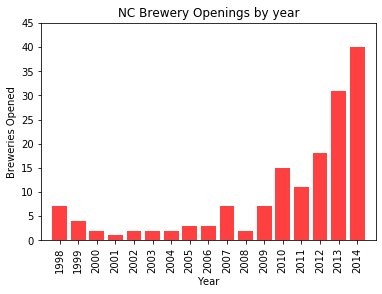

In [37]:

x_axis=yearsDF.index.to_list()

y_axis=yearsDF['Count'].to_list()

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("NC Brewery Openings by year")
plt.xlabel("Year")
plt.ylabel("Breweries Opened")

plt.xlim(1997, 2015)
plt.ylim(0, max(yearsDF['Count']) + 5)

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, yearsDF.index,rotation=90)
plt.show()

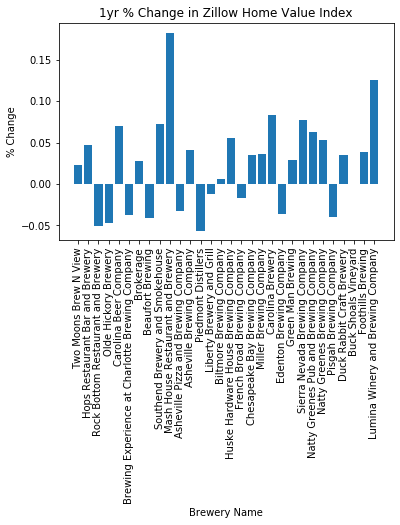

In [41]:
def plotthis(args):
    if len(args) != 3:
        print("You forgot something!")
    metric = args[0]
    ylabel = args[1]
    title = args[2]
    vals = random.sample(list(BrewOutputDF[metric]),30)
    xaxis = np.arange(0,len(vals))
    labels = BrewOutputDF["Brewery"].to_list()
    plt.bar(xaxis,vals)
    tick_locations = [value for value in xaxis]
    plt.xticks(tick_locations, labels, rotation = 'vertical')
    plt.xlabel("Brewery Name")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.rcParams['figure.figsize'] = (20,7)
    return plt.show()
plotthis(['zhviAll1',"% Change","1yr % Change in Zillow Home Value Index"])

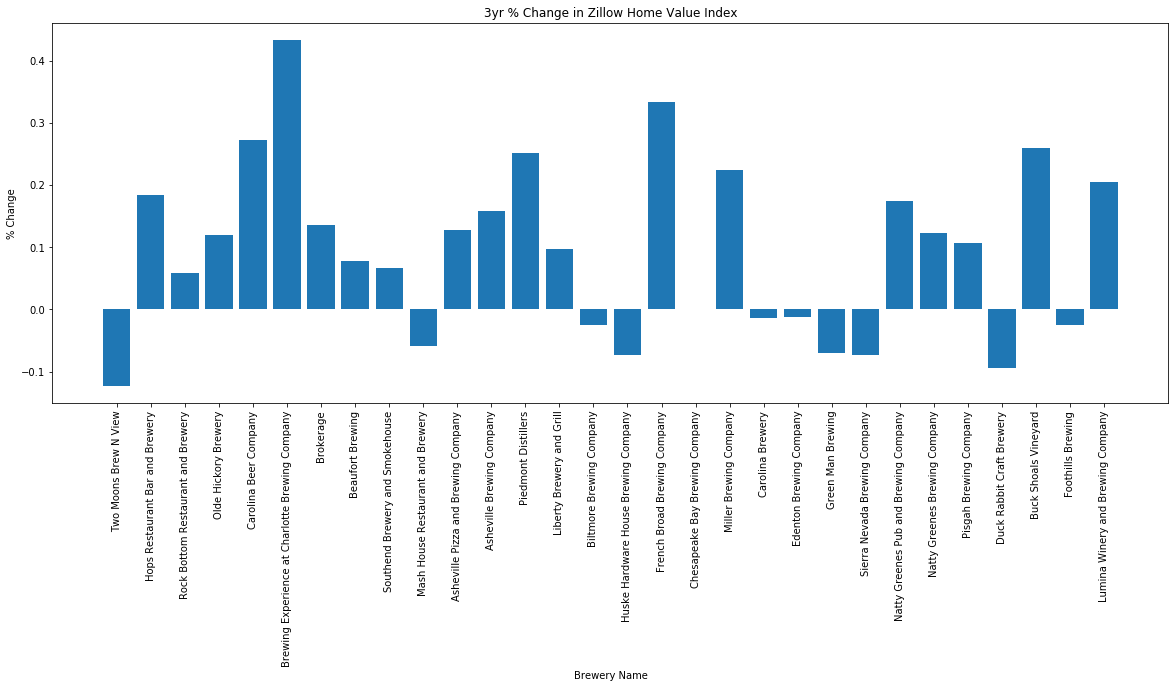

In [42]:
# run in cell below the above code
#Bar chart for 3 year % change by brewery
plotthis(['zhviAll3',"% Change","3yr % Change in Zillow Home Value Index"])

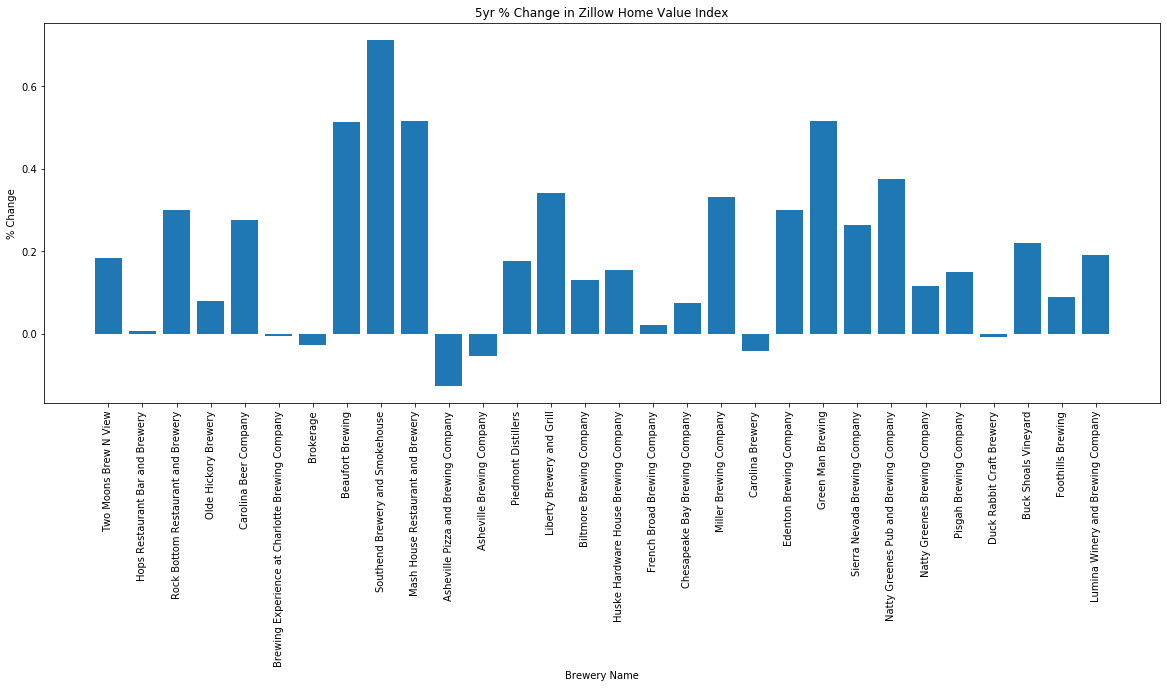

In [43]:
# run in cell below the above code
#Bar chart for 5 year % change by brewery
plotthis(['zhviAll5',"% Change","5yr % Change in Zillow Home Value Index"])